In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load the dataset
file_path = '/Users/manish/Downloads/SPAM text message 20170820 - Data.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Rename columns to match expected names
df.rename(columns={"Category": "label", "Message": "message"}, inplace=True)

# Inspect the first few rows
print(df.head())

# Encode labels (ham = 0, spam = 1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features (texts) and labels
texts = df['message'].values
labels = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Use top 5000 words
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_sequence_length = 100  # Truncate or pad to 100 words
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_sequence_length),
    SimpleRNN(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_padded, y_test)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict a few examples
sample_texts = ["Congratulations! You've won a $1,000 gift card. Call now!",
                "Hey, are we still on for lunch tomorrow?"]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_seq, maxlen=max_sequence_length)
predictions = model.predict(sample_padded)

for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"Prediction (Spam Probability): {predictions[i][0]}")


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


/Users/manish/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8212 - loss: 62544.5547 - val_accuracy: 0.8780 - val_loss: 0.8624
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9344 - loss: 1.1145 - val_accuracy: 0.9874 - val_loss: 0.0859
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9869 - loss: 0.0524 - val_accuracy: 0.9857 - val_loss: 0.0783
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9918 - loss: 0.0512 - val_accuracy: 0.9865 - val_loss: 0.0746
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9933 - loss: 0.0380 - val_accuracy: 0.9883 - val_loss: 0.0706
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9983 - loss: 0.0175 - val_accuracy: 0.9892 - val_loss: 0.0686
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9964 - loss: 0.0237 - val_accuracy: 0.9865 - val_loss: 0.0700
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9979 - loss: 0.0131 - val_

In [9]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


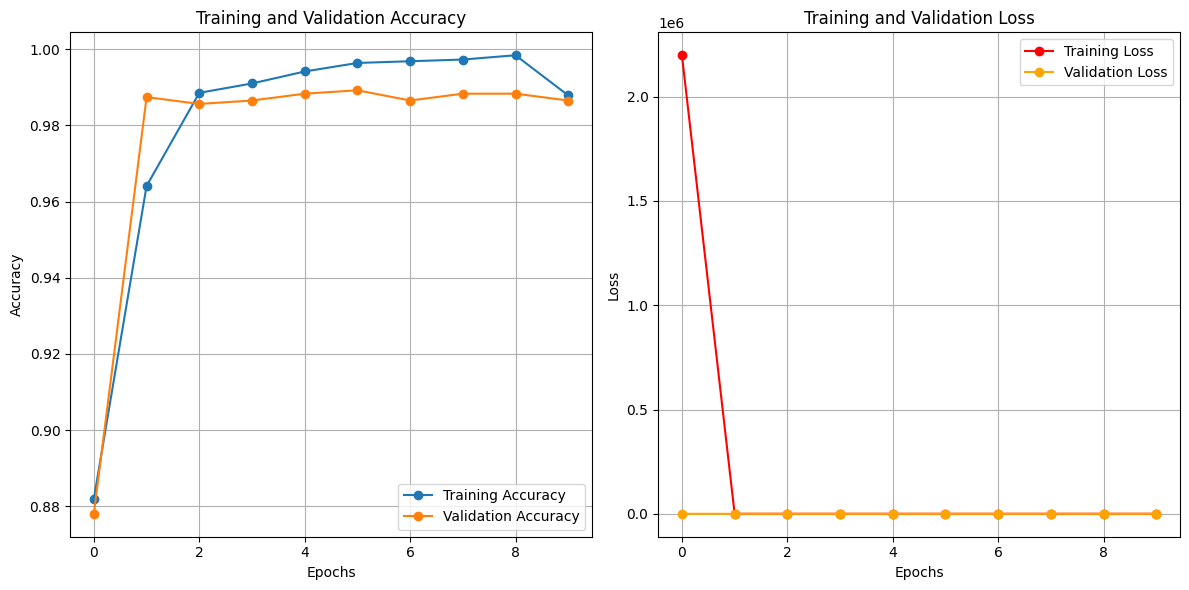

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', marker='o', color='red')
plt.plot(val_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=0)

# Print the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0701
Test Accuracy: 0.9865
